In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

In [2]:
import pandas as pd
df = pd.read_excel(r"C:\Users\shaff\Downloads\lung_cancer.xlsx")
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Preprocessing Data

In [3]:
df = df.drop(['index', 'Patient Id'], axis=1)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.info()

#tidak ada null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [5]:
df.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
# Mencetak nama kolom dan nilai unik dalam setiap kolom DataFrame yang bertipe int
for col in df.columns:
    if df[col].dtype=='int64':
        print(col)
        print(df[col].unique())
        print('-'*50)

Age
[33 17 35 37 46 52 28 44 64 39 34 27 73 36 14 24 53 62 29 65 38 19 42 32
 25 45 26 48 22 18 23 47 61 55 31 49 43 51 54 63]
--------------------------------------------------
Gender
[1 2]
--------------------------------------------------
Air Pollution
[2 3 4 7 6 5 1 8]
--------------------------------------------------
Alcohol use
[4 1 5 7 8 3 6 2]
--------------------------------------------------
Dust Allergy
[5 6 7 4 2 8 1 3]
--------------------------------------------------
OccuPational Hazards
[4 3 5 7 2 6 8 1]
--------------------------------------------------
Genetic Risk
[3 4 5 6 7 2 1]
--------------------------------------------------
chronic Lung Disease
[2 4 7 6 3 5 1]
--------------------------------------------------
Balanced Diet
[2 6 7 4 5 3 1]
--------------------------------------------------
Obesity
[4 2 7 3 5 6 1]
--------------------------------------------------
Smoking
[3 2 7 8 1 6 5 4]
--------------------------------------------------
Passive Smoker
[2 4 3

## Visualisasi Heatmap

<AxesSubplot:>

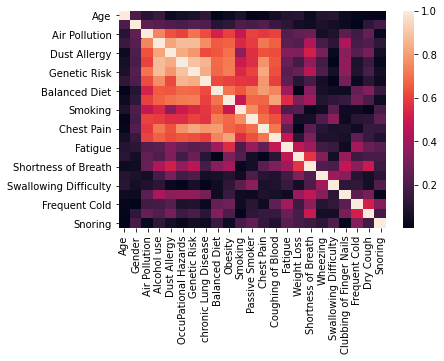

In [7]:
sns.heatmap(abs(df[df.columns].corr()))

## Feature Selection dan Splitting Data

In [8]:
y= df["Level"]
X = df.drop(["Level"],axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

## Evaluasi Model Dec

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
prediction = clf.predict(X_test)
accuracy_score(y_test,prediction)

1.0

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, scoring="accuracy", cv = 10)
scores.mean()

1.0

In [12]:
pd.crosstab(y_test,prediction, rownames = ["Reel"], colnames=["Predisction"])

Predisction,High,Low,Medium
Reel,,,
High,73,0,0
Low,0,65,0
Medium,0,0,62


In [13]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        73
         Low       1.00      1.00      1.00        65
      Medium       1.00      1.00      1.00        62

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

